In [1]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
%matplotlib inline

### data prep 

In [17]:
crime_data=pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")

In [19]:
# for part 3.All part uses data for the period 2010-2018 (remember to filter your data)

crime_data['Date1'] = pd.to_datetime(crime_data['Date'])  
crime_data1= crime_data[(crime_data.Date1.dt.year >= 2010) & (crime_data.Date1.dt.year <= 2018)]
crime_data1

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Date1
0,146196161,NON-CRIMINAL,LOST PROPERTY,Tuesday,09/23/2014,01:00,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,POINT (-122.403404791479 37.775420706711),14619616171000,2014-09-23
1,150045675,ASSAULT,BATTERY,Thursday,01/15/2015,17:00,TARAVAL,NONE,1800 Block of VICENTE ST,-122.485604,37.738821,POINT (-122.48560378101 37.7388214326705),15004567504134,2015-01-15
2,140632022,SUSPICIOUS OCC,INVESTIGATIVE DETENTION,Wednesday,07/30/2014,09:32,BAYVIEW,NONE,100 Block of GILLETTE AV,-122.396535,37.710660,POINT (-122.396535107224 37.7106603302503),14063202264085,2014-07-30
3,150383259,ASSAULT,BATTERY,Saturday,05/02/2015,23:10,BAYVIEW,"ARREST, BOOKED",2400 Block of PHELPS ST,-122.400131,37.730093,POINT (-122.400130573297 37.7300925390327),15038325904134,2015-05-02
9,111027676,ASSAULT,BATTERY,Saturday,12/24/2011,07:00,SOUTHERN,NONE,0 Block of DORE ST,-122.412933,37.773927,POINT (-122.412933062384 37.7739274524819),11102767604134,2011-12-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215019,160648742,NON-CRIMINAL,AIDED CASE,Thursday,08/11/2016,18:36,SOUTHERN,NONE,0 Block of WASHBURN ST,-122.414406,37.775236,POINT (-122.41440629479061 37.77523622314656),16064874251040,2016-08-11
2215020,160659761,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,08/15/2016,19:06,BAYVIEW,"ARREST, BOOKED",16TH ST / 3RD ST,-122.389103,37.766904,POINT (-122.38910303281254 37.76690372519212),16065976165016,2016-08-15
2215021,170285083,VEHICLE THEFT,STOLEN TRUCK,Thursday,04/06/2017,23:30,PARK,NONE,800 Block of HAIGHT ST,-122.436214,37.771317,POINT (-122.43621442698411 37.77131718410027),17028508307025,2017-04-06
2215022,160684605,LOITERING,LODGING IN PARK,Wednesday,08/24/2016,07:33,NORTHERN,NONE,1600 Block of BAY ST,-122.434155,37.802896,POINT (-122.43415507683311 37.80289596016211),16068460519062,2016-08-24


# Part 1: Questions to text and lectures.

# Part 2: Random forest and weather

# Part 3: Data visualization

In [27]:
crime_data1['New_Time'] = pd.to_datetime(crime_data1['Time']).dt.hour
crime_focus_count_hour = crime_data1.groupby(['New_Time','Category'])['IncidntNum'].count()
crime_focus_count_hour


/Users/qinlong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


New_Time  Category     
0         ARSON             147
          ASSAULT          5983
          BAD CHECKS         47
          BRIBERY            29
          BURGLARY         1944
                           ... 
23        TRESPASS          328
          VANDALISM        3895
          VEHICLE THEFT    3222
          WARRANTS         2151
          WEAPON LAWS       672
Name: IncidntNum, Length: 916, dtype: int64

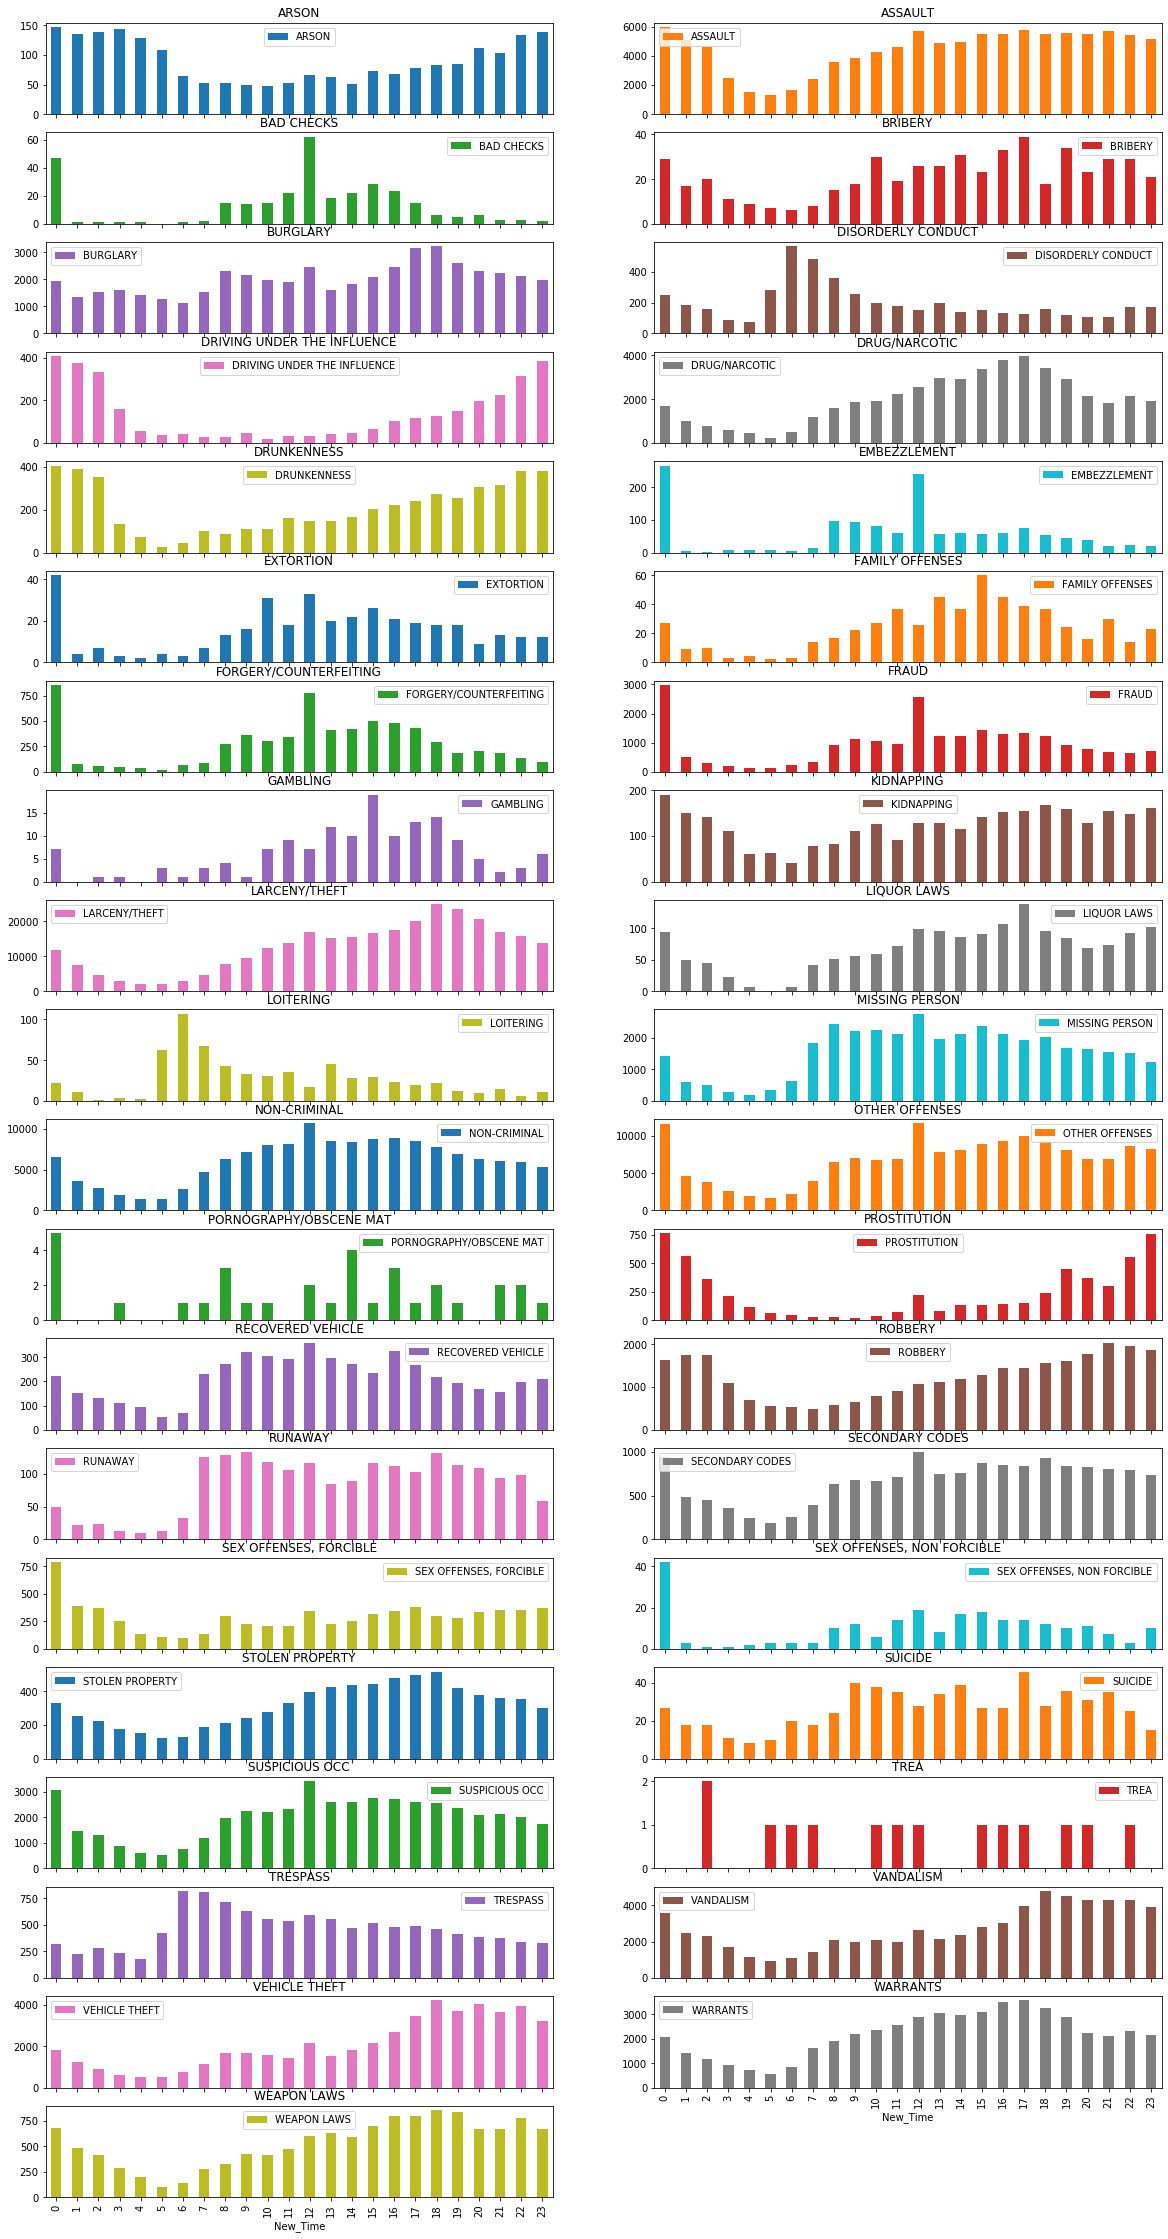

In [37]:
ax = crime_focus_count_hour.unstack().plot.bar(subplots = True, layout=(20,2), figsize = (20, 40))